# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 2.7: A DFT bidimensional

In [2]:
import math as m
from urllib.request import urlopen
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib import gridspec

### Definição da DFT bidimensional

A transformada de Fourier de uma imagem $A\in\mathcal{M}_{m,n}(\mathbb{C})$ segue bem de perto o exemplo 1.24, e corresponde aos coeficientes não-normalizados da mudança de base da representação usual (base canônica) para a base das formas básicas de onda bidimensionais dadas pelas matrizes $\mathcal{E}_{k,l}$, definidas na seção 1.7.2 como

$$\left(\mathcal{E}_{k,l}\right)_{r,s} = e^{i2\pi(kr/m+ls/n)},\quad r=0,\ldots,m-1,\quad s=0,\ldots,n-1,$$

onde escrevemos $A=\displaystyle\sum_{k=0}^{m-1}\sum_{l=0}^{n-1}c_{k,l}\mathcal{E}_{k,l}$ e obtemos os coeficientes $c_{k,l}$ pelo teorema 1.8.3 como $c_{k,l}=\frac{\left(A,\mathcal{E}_{k,l}\right)}{mn}$.

### Definição 2.7.1 (DFT bidimensional)

Dada uma matriz $A\in\mathcal{M}_{m,n}(\mathbb{C})$, definimos sua DFT $\hat{A}=DFT(A)\in\mathcal{M}_{m,n}(\mathbb{C})$ como a matriz cujas componentes são

$$\hat{A}_{k,l} = \left(A,\mathcal{E}_{k,l}\right) = \sum_{r=0}^{m-1}\sum_{s=0}^{n-1}A_{r,s}e^{-i2\pi(kr/m+ls/n)},\quad \genfrac{}{}{0pt}{}{k=0,\ldots,m-1,}{l=0,\ldots,n-1}.$$

**Observe** que nessa definição $k$ e $l$ são índices associados às *frequências de varredura por linhas e por colunas*, respectivamente, enquanto $r$ e $s$ são os índices de linhas e colunas dentro das matrizes $A$ e $\mathcal{E}_{k,l}$.

**Observe** também que a única diferença entre os coeficientes da DFT $\hat{A}_{k,l}$ e os coeficientes $c_{k,l}$ da combinação linear que expressa $A$ em função das formas básicas de onda é a ausência da constante $\frac{1}{mn}$ nos coeficientes da DFT. Isso é análogo à definição usada no caso unidimensional, sendo que necessariamente essa constante aparecerá na equação da IDFT.

### Observação 2.5

Note que a expressão
$$\hat{A}_{k,l} = \left(A,\mathcal{E}_{k,l}\right) = \sum_{r=0}^{m-1}\sum_{s=0}^{n-1}A_{r,s}e^{-i2\pi(kr/m+ls/n)}$$
é periódica em relação a $k$ e $l$, com períodos $m$ e $n$ respectivamente, ou seja
$$\hat{A}_{k+pm,l+qn} = \hat{A}_{k,l},\ \forall p,q\in\mathbb{Z}.$$

Em função disso, é possível visualizar a DFT bidimensional em outras faixas de frequência além de $k=0,\ldots,m-1,\quad l=0,\ldots,n-1$. Uma escolha comum, análoga ao caso unidimensional, consiste em utilizar a faixa
$$-\frac{m}{2}<k\le\frac{m}{2},\quad\quad-\frac{n}{2}<l\le\frac{n}{2}.$$

### Definição 2.7.2 (IDFT bidimensional)

Dada uma matriz $\hat{A}\in\mathcal{M}_{m,n}(\mathbb{C})$ definimos sua IDFT $A=IDFT(\hat{A})\in\mathcal{M}_{m,n}(\mathbb{C})$ pela expressão

$$A=\frac{1}{mn}\sum_{k=0}^{m-1}\sum_{l=0}^{n-1}\hat{A}_{k,l}\mathcal{E}_{k,l},$$

sendo que as componentes de $A$ podem ser expressas em função de $\hat{A}$ como

$$A_{r,s} = \frac{1}{mn}\sum_{k=0}^{m-1}\sum_{l=0}^{n-1}\hat{A}_{k,l}e^{i2\pi(kr/m+ls/n)},\quad r=0,\ldots,m-1,\quad s=0,\ldots,n-1.$$

**Observe** que mais uma vez nessa definição $k$ e $l$ são índices associados às *frequências de varredura por linhas e por colunas*, respectivamente, enquanto $r$ e $s$ são os índices de linhas e colunas dentro das matrizes $A$ e $\mathcal{E}_{k,l}$.

### Formulação matricial da DFT 2D

Uma relação muito importante entre a DFT unidimensional e a DFT bidimensional é a seguinte: 

### Proposição 2.7.1
se $\hat{A} = DFT(A)$, onde $A,\hat{A}\in\mathcal{M}_{m,n}(\mathbb{C})$, então

$$\hat{A} = F_mAF_n^T,$$

onde $F_m\in\mathcal{M}_{m,m}(\mathbb{C})$ e $F_n\in\mathcal{M}_{n,n}(\mathbb{C})$ são as matrizes que representam as DFTs unidimensionais nos espaços $\mathbb{C}^m$ e $\mathbb{C}^n$, respectivamente.

Para ver que isso é verdade, basta calcular o produto de matrizes acima. Vamos começar calculando a matriz $F_mA$; usando a definição do produto de matrizes:

$$\begin{array}{ll}
\left(F_mA\right)_{k,s} & = (\mbox{"linha k de $F_m$" $\quad,\quad$ "coluna s de $A$")}\\
& = \displaystyle\sum_{r=0}^{m-1}A_{r,s}e^{-i2\pi kr/m}.
\end{array}$$

Usando agora essa expressão no produto $F_mAF_n^T$, temos:
$$\begin{array}{ll}
\left(F_mAF_n^T\right)_{k,l} = ((F_mA)F_n^T)_{k,l}
& = \mbox{"linha k de $F_mA$" $\quad\times\quad$ "coluna l de $F_n^T$"}\\
& = \mbox{"linha k de $F_mA$" $\quad\times\quad$ "linha l de $F_n$"}\\
& = \displaystyle\sum_{s=0}^{n-1}(FmA)_{k,s}e^{-i2\pi ls/n}\\
& = \displaystyle\sum_{s=0}^{n-1}\left(\sum_{r=0}^{m-1}A_{r,s}e^{-i2\pi kr/m}\right)e^{-i2\pi ls/n}\\
& = \displaystyle\sum_{r=0}^{m-1}\sum_{s=0}^{n-1}A_{r,s}e^{-i2\pi(kr/m+ls/n)}\\
& = \hat{A}_{k,l}
\end{array}$$

A interpretação algorítmica da identidade $DFT(A) = F_mAF_n^T$ é a seguinte:

- A parte $F_mA$ pode ser vista como uma aplicação da DFT nas **colunas** de A:

$$F_mA = \left[\begin{array}{l|l|l|l}
\rule{0mm}{0mm}\\
F_mA^0&F_mA^1&\ldots&F_mA^{n-1}\\
\rule{0mm}{0mm}
\end{array}\right]
 = \left[\begin{array}{l|l|l|l}
\rule{0mm}{0mm}\\
DFT(A^0)&DFT(A^1)&\ldots&DFT(A^{n-1})\\
\rule{0mm}{0mm}
\end{array}\right]$$

- O produto subsequente por $F_n^T$ pode ser visto como uma aplicação da DFT nas **linhas** da matriz resultante $X=F_mA$, pois

$$XF_n^T = \left[\begin{array}{c}
\rule{2cm}{0mm}X_0F_n^T\rule{2cm}{0mm}\\\hline
X_1F_n^T\\\hline
\vdots\\\hline
X_{m-1}F_n^T
\end{array}\right]
 = \left[\begin{array}{c}
\rule{2cm}{0mm}DFT(X_0^T)^T\rule{2cm}{0mm}\\\hline
DFT(X_1^T)^T\\\hline
\vdots\\\hline
DFT(X_{m-1}^T)^T
\end{array}\right]$$

- Finalmente, a associatividade do produto de matrizes $$F_mAF_n^T=(F_mA)F_n^T=F_m(AF_n^T)$$ permite ver que o mesmo resultado poderia ser atingido calculando-se primeiro a DFT das linhas de $A$ e depois a DFT das colunas resultantes.

## Seção 2.7.1: Interpretação e exemplos da DFT 2D

- Abaixo veremos uma imagem "natural" e uma imagem sintética, e observaremos como os coeficientes de Fourier se distribuem no âmbito de frequências
$$k=0,\ldots,m-1,\quad l=0,\ldots,n-1$$
e também
$$-\frac{m}{2}<k\le\frac{m}{2},\quad\quad-\frac{n}{2}<l\le\frac{n}{2}.$$

- Como a magnitude dos coeficientes possui grande variação, visualizaremos também as imagens correspondentes ao mapeamento $\log\left(1+|\hat{A}|\right)$.

- Exploraremos também a ressíntese da imagem aplicando um esquema simples de compressão similar ao que usamos no caso unidimensional (som do sino): qualquer coeficiente com amplitude inferior a $\frac{\max|\hat{A}_{k,l}|}{1000}$ será eliminado. O objetivo é comparar as taxas de compressão atingidas e o resultado perceptual desse esquema simples de compressão.

In [3]:
url = "http://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg"
M = imread(urlopen(url).read())
# FFT da imagem
N = np.fft.fft2(M,axes=(0,1)); absN = np.abs(N)
# Centralizando fft naorigem
halfheight, halfwidth = int(absN.shape[0]/2), int(absN.shape[1]/2)
shiftN = np.roll(absN, (halfheight,halfwidth), axis=(0,1))
# Normalizando pelom ln
Nlog = np.log(1 + shiftN)
maxi, mini = Nlog.max(), Nlog.min(); Nshow = (Nlog - mini) / (maxi - mini)
# comprimindo a imagem
C = 0.0001 * absN.max()
R = 0
for val in np.nditer(N, op_flags=['readwrite']):
    if abs(val) < C:
        val[...] = 0
        R += 1
# calcula compressão em relação a cada componente R, G ou B anulada
Compression = R/(3*N.shape[0]*N.shape[1])
reM = np.round(np.real(np.fft.ifft2(N, axes=(0,1))))
reMin, reMax = reM.min(), reM.max()
reMshow = (reM - reM.min())/ (reM.max() - reM.min())
Distortion = np.linalg.norm(reM-M)**2/np.linalg.norm(M)**2

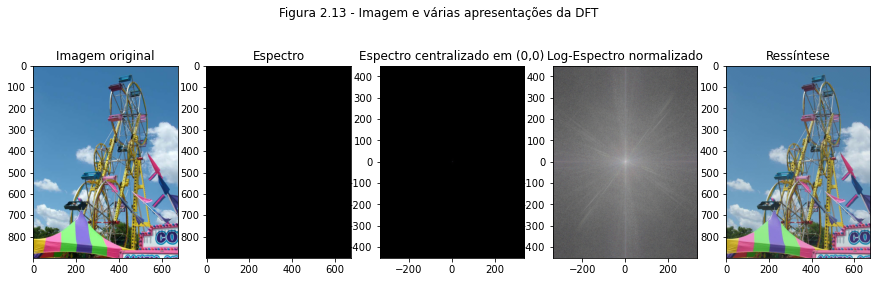

Compressão na ressíntese = 76.136%
Distorção na ressíntese = 0.104%


In [4]:
# Comandos para plotar imagens
f, ax = plt.subplots(1,5,figsize=(15,4.5))
f.suptitle("Figura 2.13 - Imagem e várias apresentações da DFT")
ax[0].set_title("Imagem original"); ax[0].imshow(M)
ax[1].set_title("Espectro"); ax[1].imshow(absN / absN.max())
ax[2].set_title("Espectro centralizado em (0,0)"); ax[2].imshow(shiftN / shiftN.max(), extent=[ -halfwidth, halfwidth,-halfheight, halfheight])
ax[3].set_title("Log-Espectro normalizado"); ax[3].imshow(Nshow, extent=[ -halfwidth, halfwidth,-halfheight, halfheight])
ax[4].set_title("Ressíntese"); ax[4].imshow(reMshow)
plt.show()
print("Compressão na ressíntese = {0:.3f}%".format(100*Compression))
print("Distorção na ressíntese = {0:.3f}%".format(100*Distortion))

In [5]:
O = np.zeros((350,450,3)); O[50:90,40:60,0:3] += 1
#FFT da imagem
N = np.fft.fft2(O,axes=(0,1)); absN = abs(N)
# Centralizando o espectro na origem
halfheight, halfwidth = int(absN.shape[0]/2), int(absN.shape[1]/2)
shiftN = np.roll(absN, (halfheight, halfwidth), axis=(0,1))
# Normalização com ln
Nlog = np.log(1 + shiftN)
maxi, mini = Nlog.max(), Nlog.min()
Nshow = (Nlog - mini) / (maxi - mini)
# comprimindo a imagem
C = 0.0001 * absN.max()
R = 0
for val in np.nditer(N, op_flags=['readwrite']):
    if abs(val) < C:
        val[...] = 0
        R += 1
# calcula compressão
Compression = R/(N.shape[0]*N.shape[1])
reM = np.round(np.real(np.fft.ifft2(N, axes=(0,1))))
reMin, reMax = reM.min(), reM.max()
reMshow = (reM - reM.min())/ (reM.max() - reM.min())
Distortion = np.linalg.norm(reM-O)**2/np.linalg.norm(O)**2

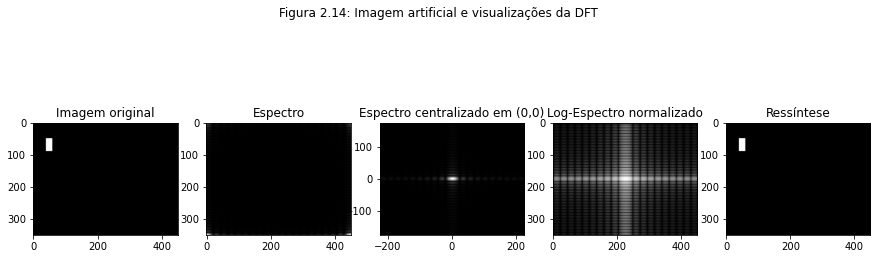

Compressão na ressíntese = 23.130%
Distorção na ressíntese = 0.000%


In [6]:
# comandos para plotar as imagens
f, ax = plt.subplots(1,5,figsize=(15,5))
f.suptitle("Figura 2.14: Imagem artificial e visualizações da DFT")
ax[0].set_title("Imagem original"); ax[0].imshow(O)
ax[1].set_title("Espectro"); ax[1].imshow(absN/ absN.max())
ax[2].set_title("Espectro centralizado em (0,0)"); ax[2].imshow(shiftN / shiftN.max(), extent=[-halfwidth, halfwidth,-halfheight,halfheight])
ax[3].set_title("Log-Espectro normalizado"); ax[3].imshow(Nshow)
ax[4].set_title("Ressíntese"); ax[4].imshow(reMshow)
plt.show()
print("Compressão na ressíntese = {0:.3f}%".format(100*Compression))
print("Distorção na ressíntese = {0:.3f}%".format(100*Distortion))